# ÏõêÏûêÏû¨ Í∞ÄÍ≤© ÌîÑÎ°úÏ†ùÌä∏

Î™©Ìëú 
- investing.comÏóê ÏûàÎäî Ï≤úÏó∞ Í∞ÄÏä§Ïùò Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏ∂úÌï¥ÏÑú ÌÖåÏù¥Î∏î ÎßåÎì§Í∏∞ 
- 'FinanceDataReader' Í∏àÏúµ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú ÏõêÌïòÎäî ÏõêÏûêÏû¨ Í∞ÄÍ≤© Í∞ÄÏ†∏Ïò§Í∏∞
- ÌïúÍµ≠Í±∞ÎûòÏÜå ÏÉÅÏû•Ï¢ÖÎ™© Ï†ÑÏ≤¥ Í∞ÄÏ†∏ÏôÄÏÑú csvÏúºÎ°ú Ï†ÄÏû• 

# investing.comÏóê Ï°¥Ïû¨ÌïòÎäî Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ(ÏàòÏ∂ú)ÌïòÍ∏∞ 

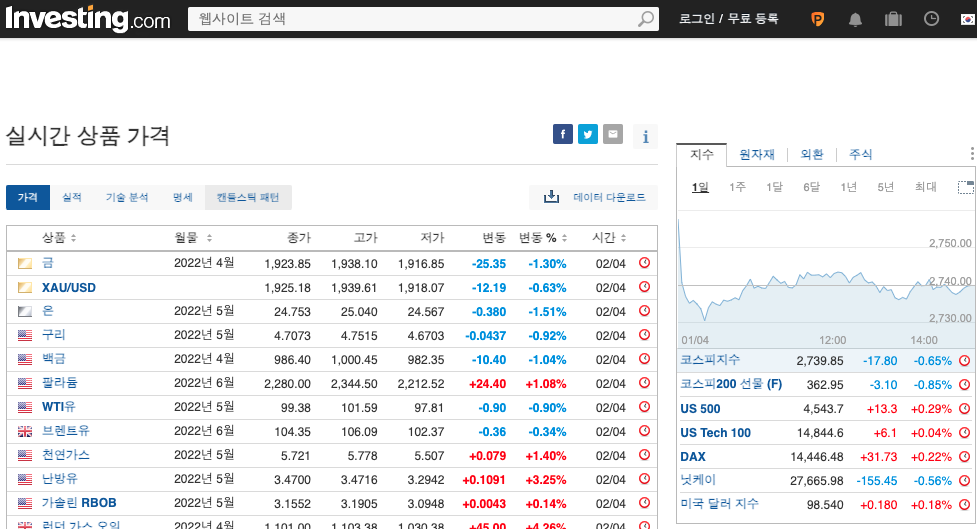

In [6]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 
import re 
import pandas as sns 
import matplotlib.pyplot as plt 

In [ ]:
#request.get()ÏúºÎ°ú url Ï†ïÎ≥¥ ÏöîÏ≤≠ÌïòÍ∏∞ 

headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36"}
url = "https://kr.investing.com/commodities/natural-gas-historical-data"

r = requests.get(url,headers=headers)
 
soup = BeautifulSoup(r.text,'lxml')


In [ ]:
# investing.com Ï≤úÏó∞ Í∞ÄÏä§ Ï†ïÎ≥¥ ÏàòÏ∂úÌïòÍ∏∞ 
date = []
closing_price = []
open = []
high = []
low = []
trading = []
change = []


dt = soup.select("#curr_table > tbody > tr > td.first.left.bold.noWrap") #ÎÇ†Ïßú
for i in dt:
  i = i.get_text().strip()
  date.append(i)

cp = soup.select("#curr_table > tbody > tr > td:nth-of-type(2)") #Ï¢ÖÍ∞Ä
for m in cp:
  m = m.get_text().strip()
  closing_price.append(m)

op = soup.select("#curr_table > tbody > tr > td:nth-of-type(3)") #Ïò§Ìîà 
for d in op:
  d = d.get_text().strip()
  open.append(d)

hg = soup.select("#curr_table > tbody > tr > td:nth-of-type(4)")# Í≥†Í∞Ä
for h in hg:
  h = h.get_text().strip()
  high.append(h)

lw= soup.select("#curr_table > tbody > tr > td:nth-of-type(5)")#Ï†ÄÍ∞Ä 
for l in lw:
  l = l.get_text().strip()
  low.append(l)

td= soup.select("#curr_table > tbody > tr > td:nth-of-type(6)")#Í±∞ÎûòÎüâ
for t in td:
  t = t.get_text().strip()
  trading.append(t)

cg= soup.select("#curr_table > tbody > tr > td:nth-of-type(7)")#Î≥ÄÎèô 
for c in cg:
  c = c.get_text().strip()
  change.append(c)


In [ ]:
#Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ≥¥ Ï†ïÎ¶¨ÌïòÍ∏∞ 

df = pd.DataFrame ({
    "ÎÇ†Ïßú": date,
    "Ï¢ÖÍ∞Ä": closing_price,
    "Ïò§Ìîà": open,
    "Í≥†Í∞Ä": high,
    "Ï†ÄÍ∞Ä": low,
    "Í±∞ÎûòÎüâ": trading,
    "Î≥ÄÎèô": change,
})

#ÌÖåÏù¥Î∏î Î≥¥Í∏∞ 
df.tail(5)

ÎÇ†Ïßú     Ï¢ÖÍ∞Ä     Ïò§Ìîà     Í≥†Í∞Ä     Ï†ÄÍ∞Ä      Í±∞ÎûòÎüâ      Î≥ÄÎèô
17  2022ÎÖÑ 03Ïõî 09Ïùº  4.526  4.569  4.625  4.450   95.13K  -0.02%
18  2022ÎÖÑ 03Ïõî 08Ïùº  4.527  4.818  4.882  4.507  159.17K  -6.33%
19  2022ÎÖÑ 03Ïõî 07Ïùº  4.833  5.041  5.184  4.781  130.86K  -3.65%
20  2022ÎÖÑ 03Ïõî 04Ïùº  5.016  4.750  5.045  4.728  125.39K   6.23%
21  2022ÎÖÑ 03Ïõî 03Ïùº  4.722  4.795  4.936  4.628  137.15K  -0.84%

# Í∏àÏö© Îç∞Ïù¥ÌÑ∞Î•º Îçî ÏâΩÍ≤å ÏàòÏßëÌïòÎäî Î∞©Î≤ï Î≠êÍ∞Ä ÏûàÏùÑÍπå?üßê

"FinanceDataReader" Í∏àÏö© Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌïúÍµ≠ Ï£ºÏãù Í∞ÄÍ≤©, ÎØ∏Íµ≠Ï£ºÏãù Í∞ÄÍ≤©, ÏßÄÏàò, ÌôòÏú®, ÏïîÌò∏ÌôîÌèê Í∞ÄÍ≤© Î∞è Ï¢ÖÎ™© Î¶¨Ïä§ÌåÖÏùÑ Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÎã§. üåû

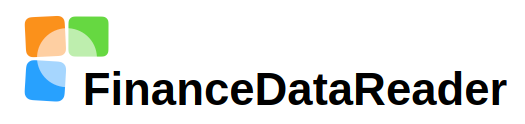

In [ ]:
#Finance Data Reader Îã§Ïö¥Î°úÎìú Ïã§ÌñâÌïòÍ∏∞ 
! pip install finance-datareader

In [12]:
import FinanceDataReader as fdr

# 'Ï≤úÏó∞Í∞ÄÏä§' 2022ÎÖÑ 1Ïõî 3ÏùºÎ∂ÄÌÑ∞ 4Ïõî 1ÏùºÍ∞ÑÏùò Í∞ÄÍ≤© Í∞ÄÏ†∏Ïò§Í∏∞ 
df = fdr.DataReader('NG','2022-01-03','2022-04-01')
df.head()

Close   Open   High    Low    Volume  Change
Date                                                    
2022-01-03  3.815  3.702  3.858  3.638   99070.0  0.0228
2022-01-04  3.717  3.817  3.944  3.709  133390.0 -0.0257
2022-01-05  3.882  3.747  3.897  3.717   96810.0  0.0444
2022-01-06  3.812  3.842  3.931  3.801  116580.0 -0.0180
2022-01-07  3.916  3.860  3.980  3.800  127010.0  0.0273

In [ ]:
# 2022ÎÖÑ 1Ïõî 3ÏùºÎ∂ÄÌÑ∞ 4Ïõî 1Ïùº Í∞ÑÏùò Ï≤úÏó∞Í∞ÄÏä§ Ï∫îÎì§Ï∞®Ìä∏ 
fdr.chart.plot(df)

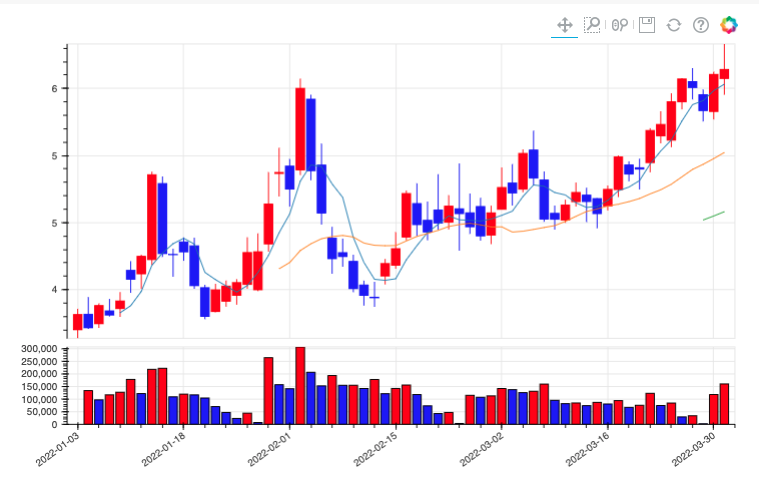

# ÌîåÎ°úÌãÄÎ¶¨ (Plotly)Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïã§ÏãúÍ∞ÑÏúºÎ°ú Î≥º Ïàò ÏûàÎäî ÏûêÎèôÌôî Ï∫îÎì§Ï∞®Ìä∏Î•º ÎßåÎì§Ïñ¥ Î≥¥Ïûê 

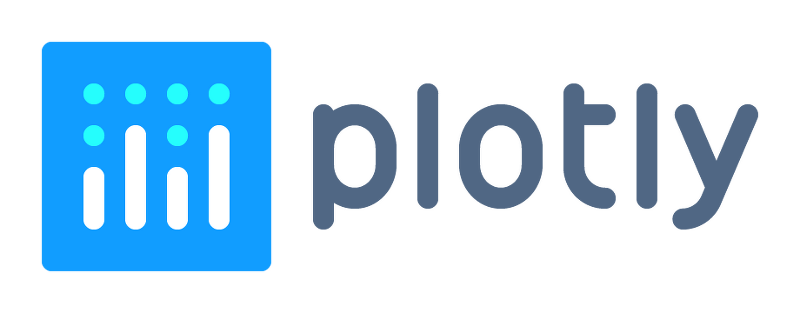

In [ ]:
import plotly.graph_objects as go 


#ÏûêÎèô Ï≤úÏó∞Í∞ÄÏä§ Ï∫îÎì§Ï∞®Ìä∏ ÎßåÎì§Í∏∞ 

graph = {
    'x' : df.index, 
    'open' : df.Open,
    'close' : df.Close,
    'high' : df.High, 
    'low' : df.Low, 
    'type': 'candlestick', 
    'name' : 'NG',
    'showlegend': True
}

layout = go.Figure (
    data = [graph],
    layout_title = 'NG'
)

layout

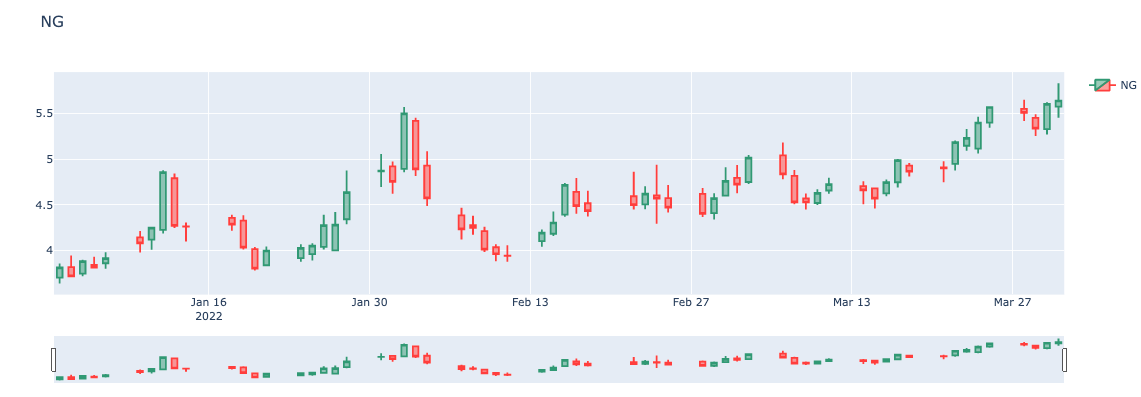

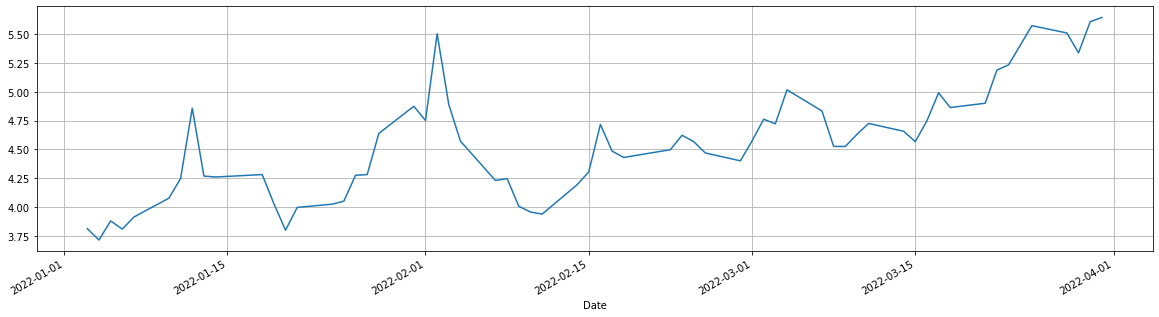

In [ ]:
# Ï≤úÎÖÑÍ∞ÄÏä§, 2018ÎÖÑ~ÌòÑÏû¨Í∞ÑÏùò ÏãúÍ≥ÑÏó¥ Ï∞®Ìä∏ 
df['Close'].plot(figsize = (20,5), grid = True)

In [ ]:
# Ïï†Ìîå (AAPL) 2022ÎÖÑ 1Ïõî 3ÏùºÎ∂ÄÌÑ∞ 4Ïõî 1ÏùºÍ∞ÑÏùò Í∞ÄÍ≤© Í∞ÄÏ†∏Ïò§Í∏∞ 

mf = fdr.DataReader('AAPL','2022')
mf.head()

Close    Open    High     Low      Volume  Change
Date                                                          
2022-01-03  182.01  177.83  182.88  177.71  96490000.0  0.0250
2022-01-04  179.70  182.63  182.94  179.12  92660000.0 -0.0127
2022-01-05  174.92  179.61  180.17  174.64  93490000.0 -0.0266
2022-01-06  172.00  172.70  175.30  171.64  95420000.0 -0.0167
2022-01-07  172.17  172.89  174.14  171.03  86710000.0  0.0010

In [ ]:
#Ïï†Ìîå Ï∫îÎì§Ïä§Ìã± (1/3 ~ 4/1)
fdr.chart.plot(mf, title = "Ïï†Ìîå(AAPL)")

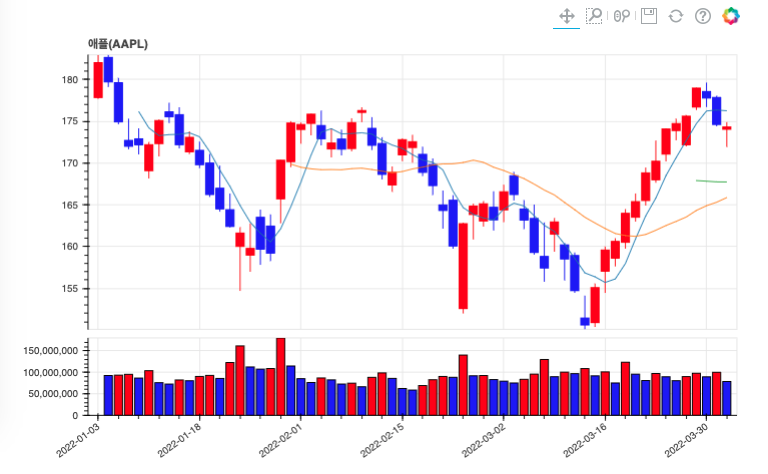

In [ ]:
# Ïπ¥Ïπ¥Ïò§ (035720) 2022ÎÖÑ Í∞ÄÍ≤© Í∞ÄÏ†∏Ïò§Í∏∞
ka = fdr.DataReader('035720','2022')
ka.head()

Open    High     Low   Close   Volume    Change
Date                                                         
2022-01-03  113500  117000  113000  114500  1846049  0.017778
2022-01-04  114000  114500  111000  111500  2396207 -0.026201
2022-01-05  111000  111000  105000  105500  5108428 -0.053812
2022-01-06  102500  103000   99900  100000  7120428 -0.052133
2022-01-07  100000  101500   99800  100000  3962672  0.000000

In [ ]:
# Ï∫îÎì§Ï∞®Ìä∏ ÏÑ§Ï†ïÌïòÍ∏∞ 
fdr.chart.config( title ="Ïπ¥Ïπ¥Ïò§")
fdr.chart.config(width=600, height = 300)
fdr.chart.config (volume = False)

fdr.chart.plot(ka)

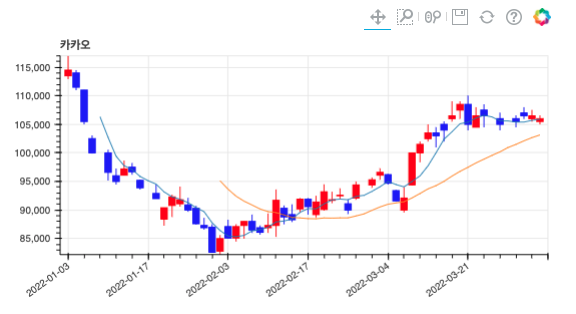

In [ ]:
#Îü∞ÎçòÍ∞ÄÏä§ Ï£ºÏöî Í∞ÄÏ†∏Ïò§Í∏∞ 
lo = fdr.DataReader('G','2022')

#dictÏúºÎ°ú Ï∫îÎì§Ï∞®Ìä∏ ÏÑ§Ï†ï 
config = {'title':'Îü∞Îçò Í∞ÄÏä§ Ïò§Ïùº ÏÑ†Î¨º Í∞ÄÍ≤© ', 
          'width': 600, 
          'height': 300,
          'volume': True,
}

fdr.chart.config(config=config)

fdr.chart.plot(lo)

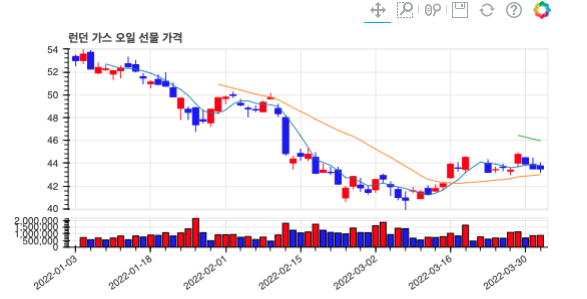

In [ ]:
# Î™®Îì† ÏÑ§Ï†ïÏùÑ Ï¥àÍ∏∞ Í∏∞Î≥∏ ÏÑ§Ï†ïÏúºÎ°ú ÎêòÎèåÎ¶¨Í∏∞ 
fdr.chart.config(reset=True)

In [14]:
sa = fdr.DataReader("005930","2022")
fdr.chart.plot(sa, title = "ÏÇºÏÑ± Ï†ÑÏûê(005930")


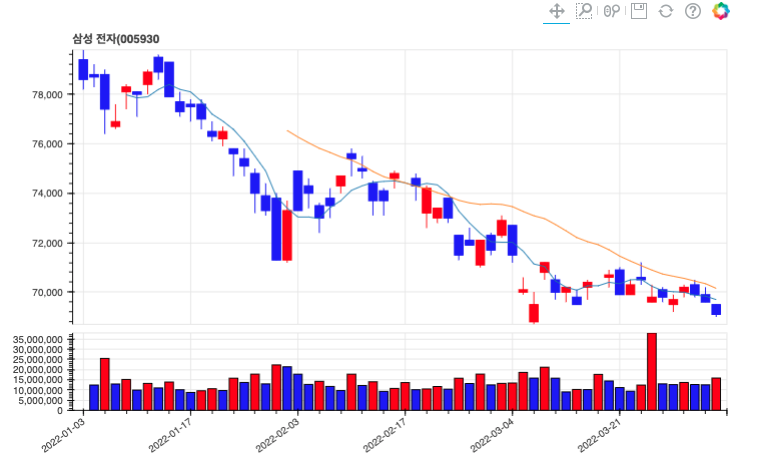

In [ ]:
# ÏûêÎèôÌôî Ï∫îÎì§Ï∞®Ìä∏ ÎßåÎì§Í∏∞ 
graph = {
    'x' : sa.index, 
    'open' : sa.Open,
    'close' : sa.Close,
    'high' : sa.High, 
    'low' : sa.Low, 
    'type': 'candlestick', 
    'name' : 'ÏÇºÏÑ± Ï†ÑÏûê',
    'showlegend': True
}

layout = go.Figure (
    data = [graph],
    layout_title = 'ÏÇºÏÑ± Ï†ÑÏûê'
)

layout

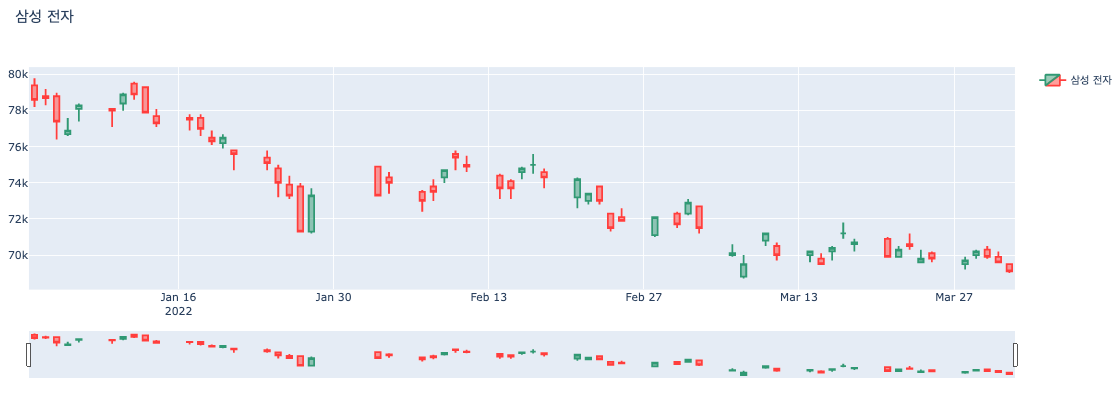

# ÎßåÏïΩ ÏÉÅÏû•Ï¢ÖÎ™© Î¶¨Ïä§Ìä∏Î•º Í∞ÄÏ†∏Ïò§Í≥† Ïã∂ÏúºÎ©¥ Ïñ¥ÎñªÍ≤å ÌïòÎ©¥ Ï¢ãÏùÑÍπå?üßê

Ï†ïÎã¥ : "FinanceDataReader"Ïùò StockListingÏóê Í±∞ÎûòÏÜå Ïù¥Î¶ÑÏùÑ Ï†ÅÏñ¥Ï£ºÎ©¥ ÎêúÎã§. 

In [ ]:
#ÌïúÍµ≠Í±∞ÎûòÏÜå ÏÉÅÏû•Ï¢ÖÎ™© Ï†ÑÏ≤¥ Í∞ÄÏ†∏Ïò§Í∏∞ 

df_krx = fdr.StockListing('KRX')
df_krx.head()

Symbol  Market    Name           Sector             Industry ListingDate  \
0  060310  KOSDAQ      3S         Ï†ÑÏûêÎ∂ÄÌíà Ï†úÏ°∞ÏóÖ          Î∞òÎèÑÏ≤¥ Ïõ®Ïù¥Ìçº Ï∫êÎ¶¨Ïñ¥  2002-04-23   
1  095570   KOSPI  AJÎÑ§Ìä∏ÏõçÏä§  ÏÇ∞ÏóÖÏö© Í∏∞Í≥Ñ Î∞è Ïû•ÎπÑ ÏûÑÎåÄÏóÖ  Î†åÌÉà(ÌååÎ†õÌä∏, OAÏû•ÎπÑ, Í±¥ÏÑ§Ïû•ÎπÑ)  2015-08-21   
2  006840   KOSPI   AKÌôÄÎî©Ïä§           Í∏∞ÌÉÄ Í∏àÏúµÏóÖ                 ÏßÄÏ£ºÏÇ¨ÏóÖ  1999-08-11   
3  054620  KOSDAQ  APSÌôÄÎî©Ïä§           Í∏∞ÌÉÄ Í∏àÏúµÏóÖ          Ïù∏ÌÑ∞ÎÑ∑ Ìä∏ÎûòÌîΩ ÏÜîÎ£®ÏÖò  2001-12-04   
4  265520  KOSDAQ   APÏãúÏä§ÌÖú    ÌäπÏàò Î™©Ï†ÅÏö© Í∏∞Í≥Ñ Ï†úÏ°∞ÏóÖ          ÎîîÏä§ÌîåÎ†àÏù¥ Ï†úÏ°∞ Ïû•ÎπÑ  2017-04-07   

  SettleMonth     Representative                       HomePage Region  
0         03Ïõî                ÍπÄÏÑ∏ÏôÑ           http://www.3sref.com  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  
1         12Ïõî           Î∞ïÎåÄÌòÑ, ÏÜêÏÇºÎã¨         http://www.ajnet.co.kr  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  
2         12Ïõî  Ï±ÑÌòïÏÑù, Ïù¥ÏÑùÏ£º(Í∞ÅÏûê ÎåÄÌëúÏù¥ÏÇ¨)  http://www.aekyunggroup.co.kr  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  
3         12Ïõî                Ï†ïÍ∏∞Î°ú   http://www.apsholdings.co.kr    Í≤ΩÍ∏∞ÎèÑ  
4         12Ïõî                ÍπÄÏòÅÏ£º     http://www.apsystems.co.kr    Í≤ΩÍ∏∞ÎèÑ

In [ ]:
# Ï†ïÎ≥¥Îì§ÏùÑ csvÏúºÎ°ú Ï†ÄÏû• 
df_krx.to_csv("ÌïúÍµ≠Í±∞ÎûòÏÜå_ÏÉÅÏû•Ï¢ÖÎ™©.csv", mode = "w", encoding = 'euc-kr')
print("save")

save


Ï†ÄÏû•Îêú ÌååÏùºÏùÑ Î≥º Ïàò ÏûàÎã§.

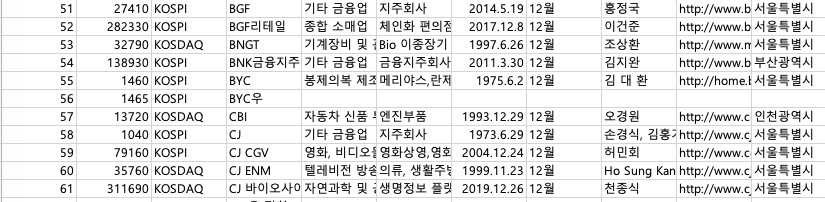